# Using t-SNE to visualize similar words from texts

First of all install dependencies

```bash
$ pip install gensim numpy matplotlib sklearn
```

***t-Distributed Stochastic Neighbor Embedding (t-SNE)*** is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets. The technique can be implemented via Barnes-Hut approximations, allowing it to be applied on large real-world datasets.

We want to visualize the classification cluster from a data set, in our case it's a text, and we expect to classify the words in the text to  clusters with same kind of information. Think of that, we can search for `computer` and we want to classify the words with same meaning, like `laptop`, `laptop-computer`, `pc`, even `Dell`.

For do that we can use ***t-Distributed Stochastic Neighbor Embedding (t-SNE)***.

In [1]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

# %matplotlib notebook

The data can be downloaded from command prompt:
```bash
$ wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
```

In [8]:
model = gensim.models.KeyedVectors.load_word2vec_format('/storage/workspace/data/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [10]:
# there are 3000000 words indexed
len(model.index2word)

3000000

In [3]:
# Test the loaded word2vec model in gensim
# We will need the raw vector for a word
print(model['computer']) 

# We will also need to get the words closest to a word
model.similar_by_word('computer')

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

/usr/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('computers', 0.79793781042099),
 ('laptop', 0.6640492081642151),
 ('laptop_computer', 0.6548866629600525),
 ('Computer', 0.6473335027694702),
 ('com_puter', 0.6082081198692322),
 ('technician_Leonard_Luchko', 0.5662747025489807),
 ('mainframes_minicomputers', 0.5617724061012268),
 ('laptop_computers', 0.5585451126098633),
 ('PC', 0.5539618134498596),
 ('maker_Dell_DELL.O', 0.5519253611564636)]

In [4]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

/usr/lib/python3.7/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


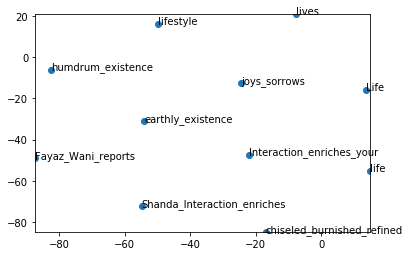

In [7]:
display_closestwords_tsnescatterplot(model, 'life')